In [17]:
import tensorflow as tf
from keras.applications.vgg16 import VGG16
from keras.models import Model
from keras.layers import Dense
from keras.layers import Flatten
from pickle import dump
import pickle
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# load model without classifier layers
model = VGG16(include_top=False, input_shape=(224, 224, 3))

58900480/58889256 [==============================] - 1s 0us/step


In [3]:

# add new classifier layers
flat1 = Flatten()(model.layers[-1].output)
class1 = Dense(1024, activation='relu')(flat1)
output = Dense(10, activation='softmax')(class1)
# define new model
model = Model(inputs=model.inputs, outputs=output)
# add new classifier layers
flat1 = Flatten()(model.layers[-1].output)
class1 = Dense(1024, activation='relu')(flat1)
output = Dense(7, activation='softmax')(class1)
# define new model
model = Model(inputs=model.inputs, outputs=output)
# summarize
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0   

In [4]:
for layer in model.layers:
	layer.trainable = False

In [5]:
model.get_layer('dense_2').trainable = True
model.get_layer('dense_3').trainable = True

In [6]:
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0   

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
infile = open('/content/drive/MyDrive/x_file','rb')
X = pickle.load(infile)
infile.close()

In [9]:
img_size = 224
X = np.array(X).reshape(-1, img_size, img_size, 3)

In [10]:
infile = open('/content/drive/MyDrive/y_file','rb')
y = pickle.load(infile)
infile.close()

Y = np.array(y)

In [11]:
model.compile(loss='sparse_categorical_crossentropy', optimizer="adam", metrics=["accuracy"])

In [12]:
infile = open('/content/drive/MyDrive/x_test_file','rb')
X_test = pickle.load(infile)
infile.close()

In [13]:
img_size = 224
X_test = np.array(X_test).reshape(-1, img_size, img_size, 3)

In [14]:
infile = open('/content/drive/MyDrive/y_test_file','rb')
y_test = pickle.load(infile)
infile.close()

Y_test = np.array(y_test)

In [15]:
#model.fit(X,Y, epochs=25)
from keras import callbacks
earlystopping = callbacks.EarlyStopping(monitor ="val_loss", 
                                        mode ="min", patience = 5, 
                                        restore_best_weights = True)
  
history = model.fit(X, Y, epochs = 25,validation_data =(X_test[:1200], Y_test[:1200]), callbacks =[earlystopping])

Epoch 1/25
202/202 [==============================] - 2311s 11s/step - loss: 1.9195 - accuracy: 0.1798 - val_loss: 1.8786 - val_accuracy: 0.1608
Epoch 2/25
202/202 [==============================] - 2291s 11s/step - loss: 1.9163 - accuracy: 0.1789 - val_loss: 1.8877 - val_accuracy: 0.1725
Epoch 3/25
202/202 [==============================] - 2365s 12s/step - loss: 1.9160 - accuracy: 0.1795 - val_loss: 1.8833 - val_accuracy: 0.1858
Epoch 4/25
202/202 [==============================] - 2343s 12s/step - loss: 1.9131 - accuracy: 0.1873 - val_loss: 1.8835 - val_accuracy: 0.1675
Epoch 5/25
202/202 [==============================] - 2288s 11s/step - loss: 1.9132 - accuracy: 0.1782 - val_loss: 1.8805 - val_accuracy: 0.1917
Epoch 6/25
202/202 [==============================] - 2261s 11s/step - loss: 1.9123 - accuracy: 0.1863 - val_loss: 1.8791 - val_accuracy: 0.1800


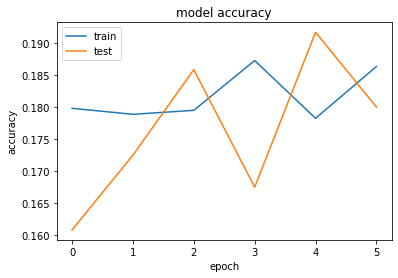

In [18]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [19]:
model.save('vgg_model_9507.h5')